In [2]:
print("VGG19")

VGG19


In [1]:
import torch

# VGG 19

### convolutional layers, max pooling layers, fully conneected layers

<!-- ![imag 1_8063.png](<attachment:imag 1_8063.png>)
 -->
 <!-- 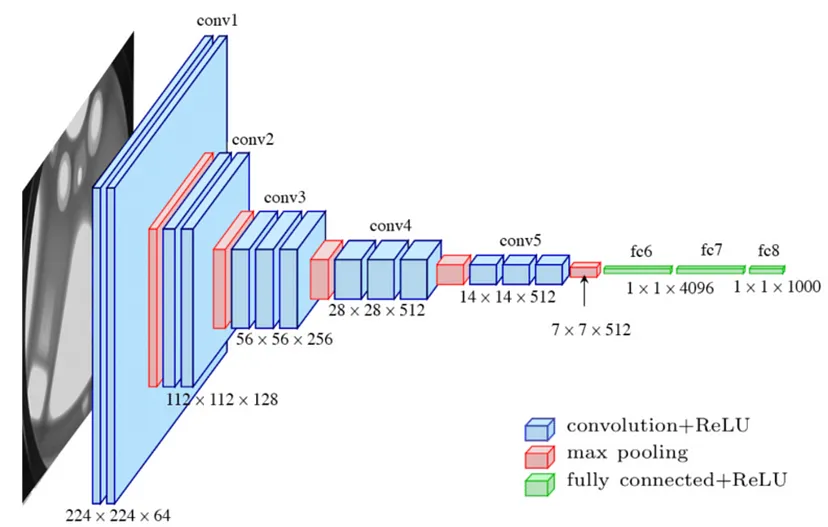 -->
 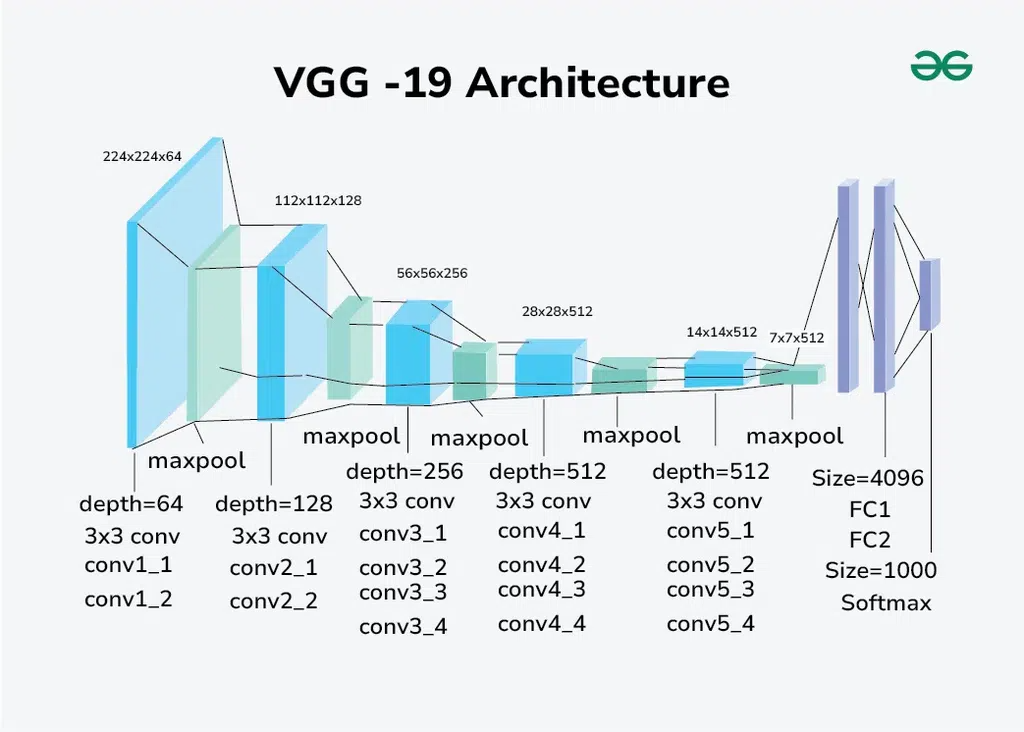
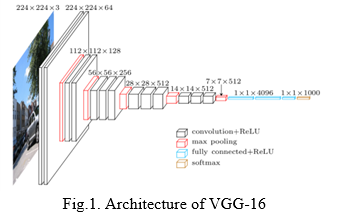

In [4]:
#all the numbers after conv and pool fc are the layer numbers
#I gave every layer as an object i.e., 1 layer which is a convolutional layer => conv1 or 14th layer which is a fc layer=> fc14
import torch
import torch.nn as nn
import torch.nn.functional as F
class VGG19(nn.Module):
    def __init__(self):
        super(VGG19, self).__init__()
        # CONV1 
        # self.conv1 = nn.Conv2d(in_channels=3 ,out_channels=64,kernel_size=3, stride: ,padding:)
        # Conv1 Block 2x(224x224x64)
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Conv2 Block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Conv3 Block
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv7 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv8 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Conv4 Block
        self.conv9 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv10 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv11 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Conv5 Block
        self.conv13 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv14 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv15 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv16 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        # fc layers
        self.fc17 = nn.Linear(512 * 7 * 7, 4096)  #14th layer which is the first fully connected layer
        self.fc18 = nn.Linear(4096, 4096)         
        self.fc19 = nn.Linear(4096, 1000)         

        # Activation functions and dropout
        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Conv1 Block
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool1(x)

        # Conv2 Block
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.pool2(x)

        # Conv3 Block
        x = self.relu(self.conv5(x))
        x = self.relu(self.conv6(x))
        x = self.relu(self.conv7(x))
        x = self.relu(self.conv8(x))
        x = self.pool3(x)

        # Conv4 Block
        x = self.relu(self.conv9(x))
        x = self.relu(self.conv10(x))
        x = self.relu(self.conv11(x))
        x = self.relu(self.conv12(x))
        x = self.pool4(x)

        # Conv5 Block
        x = self.relu(self.conv13(x))
        x = self.relu(self.conv14(x))
        x = self.relu(self.conv15(x))
        x = self.relu(self.conv16(x))
        x = self.pool5(x)

        # Flattening for fully connected layers
        x = torch.flatten(x, 1)

        # Fully connected layers
        x = self.dropout(self.relu(self.fc17(x)))  # fc6
        x = self.dropout(self.relu(self.fc18(x)))  # fc7
        x = self.fc19(x)                           # fc8, output layer

        return x

In [7]:
testmodel=VGG19()
print((testmodel.state_dict().keys()))
from torchvision import models
pretrained_vgg19 = models.vgg19(pretrained=True)
print(pretrained_vgg19.state_dict().keys())

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'conv3.weight', 'conv3.bias', 'conv4.weight', 'conv4.bias', 'conv5.weight', 'conv5.bias', 'conv6.weight', 'conv6.bias', 'conv7.weight', 'conv7.bias', 'conv8.weight', 'conv8.bias', 'conv9.weight', 'conv9.bias', 'conv10.weight', 'conv10.bias', 'conv11.weight', 'conv11.bias', 'conv12.weight', 'conv12.bias', 'conv13.weight', 'conv13.bias', 'conv14.weight', 'conv14.bias', 'conv15.weight', 'conv15.bias', 'conv16.weight', 'conv16.bias', 'fc17.weight', 'fc17.bias', 'fc18.weight', 'fc18.bias', 'fc19.weight', 'fc19.bias'])
odict_keys(['features.0.weight', 'features.0.bias', 'features.2.weight', 'features.2.bias', 'features.5.weight', 'features.5.bias', 'features.7.weight', 'features.7.bias', 'features.10.weight', 'features.10.bias', 'features.12.weight', 'features.12.bias', 'features.14.weight', 'features.14.bias', 'features.16.weight', 'features.16.bias', 'features.19.weight', 'features.19.bias', 'features.21.weight', 'feat

In [9]:
testmodel.state_dict()['conv1.weight'].copy_(pretrained_vgg19.state_dict()['features.0.weight'])
diction={
    'conv1.weight':'features.0.weight',
    'conv1.bias':'features.0.bias',
    'conv2.weight':'features.2.weight',
    'conv2.bias':'features.2.bias',
    'conv3.weight':'features.5.weight',
    'conv3.bias':'features.5.bias',
    'conv4.weight':'features.7.weight',
    'conv4.bias':'features.7.bias',
    'conv5.weight':'features.10.weight',
    'conv5.bias':'features.10.bias',
    'conv6.weight':'features.12.weight',
    'conv6.bias':'features.12.bias',
    'conv7.weight':'features.14.weight',
    'conv7.bias':'features.14.bias',
    'conv8.weight':'features.16.weight',
    'conv8.bias':'features.16.bias',
    'conv9.weight':'features.19.weight',
    'conv9.bias':'features.19.bias',
    'conv10.weight':'features.21.weight',
    'conv10.bias':'features.21.bias',
    'conv11.weight':'features.23.weight',
    'conv11.bias':'features.23.bias',
    'conv12.weight':'features.25.weight',
    'conv12.bias':'features.25.bias',
    'conv13.weight':'features.28.weight',
    'conv13.bias':'features.28.bias',
    'conv14.weight':'features.30.weight',
    'conv14.bias':'features.30.bias',
    'conv15.weight':'features.32.weight',
    'conv15.bias':'features.32.bias',
    'conv16.weight':'features.34.weight',
    'conv16.bias':'features.34.bias',
    'fc17.weight':'classifier.0.weight',
    'fc17.bias':'classifier.0.bias',
    'fc18.weight':'classifier.3.weight',
    'fc18.bias':'classifier.3.bias',
    'fc19.weight':'classifier.6.weight',
    'fc19.bias':'classifier.6.bias',
}
for item in diction.items():
    testmodel.state_dict()[item[0]].copy_(pretrained_vgg19.state_dict()[item[1]])
    


In [10]:
from torchvision import models, transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

from PIL import Image
img = Image.open("C:/Users/Sriram Nangunoori/Downloads/Fightclub/wallpaperflare.com_wallpaper (3).jpg")
input_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Ensure both models are in evaluation mode
testmodel.eval()
pretrained_vgg19.eval()

# Get predictions
with torch.no_grad():
    output_custom = testmodel(input_tensor)
    output_pretrained = pretrained_vgg19(input_tensor)

# Compare the predictions
difference = torch.abs(output_custom - output_pretrained).sum()
print(difference)
print(output_custom==output_pretrained)
print(f"Total difference between final outputs: {difference.item()}")

# Check if the outputs are approximately the same
if difference.item() < 1e-5:  # Tolerance threshold
    print("The models are giving nearly identical outputs. Validation passed.")
else:
    print("The models differ significantly. Check for potential issues.")

tensor(0.)
tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, Tr